# Yang data set

Import packages:


In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns

Read the file:

In [2]:
#Processed data
adata = sc.read_h5ad('/home/anna/RP2/Yang/processed_yang.h5ad')

In [29]:
adata.obs

,Author,BioSample,Run,Tissue
CellID,,,,
SRR14309777:AAACGCTAGGTTAGTAx,Yang_2021,SAMN18844851,SRR14309777,placenta
SRR14309777:AAAGTCCCATCGGAAGx,Yang_2021,SAMN18844851,SRR14309777,placenta
SRR14309777:AACAAAGCAATCAAGAx,Yang_2021,SAMN18844851,SRR14309777,placenta
SRR14309777:AAAGGTACAATTTCTCx,Yang_2021,SAMN18844851,SRR14309777,placenta
SRR14309777:AAACGAAGTTACACACx,Yang_2021,SAMN18844851,SRR14309777,placenta
...,...,...,...,...
SRR14309755:TTTGGTTGTATACCCAx,Yang_2021,SAMN18844863,SRR14309755,placenta
SRR14309755:TTTGTTGTCATTGCGAx,Yang_2021,SAMN18844863,SRR14309755,placenta
SRR14309755:TTTCACAGTTTCGACAx,Yang_2021,SAMN18844863,SRR14309755,placenta


In [27]:
#Unprocessed data
adata = sc.read_loom('/home/anna/RP2/Yang/martyna_yang.loom')

/home/anna/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [33]:
# Extract the index from adata.obs
cell_ids = adata.obs.index

# Count occurrences of each CellID
duplicate_counts = cell_ids.value_counts()

# Identify duplicates
duplicates = duplicate_counts[duplicate_counts > 1]

# Print the duplicates
print("Duplicate CellIDs and their counts:")
print(duplicates)

Duplicate CellIDs and their counts:
Series([], Name: count, dtype: int64)


In [34]:
cell_ids

Index(['SRR14309777:AAACGCTAGGTTAGTAx', 'SRR14309777:AAAGTCCCATCGGAAGx',
       'SRR14309777:AACAAAGCAATCAAGAx', 'SRR14309777:AAAGGTACAATTTCTCx',
       'SRR14309777:AAACGAAGTTACACACx', 'SRR14309777:AACCAACAGGCGACATx',
       'SRR14309777:AAAGTCCCAGGAGGAGx', 'SRR14309777:AACAACCCAAGAGTATx',
       'SRR14309777:AACCCAAAGGGCCAATx', 'SRR14309777:AACAAAGAGTCCTGTAx',
       ...
       'SRR14309755:TTTGACTCAATGCTCAx', 'SRR14309755:TTTGGAGCAATCCTAGx',
       'SRR14309755:TTTGGAGCACTGAGGAx', 'SRR14309755:TTTGGAGAGTTCACTGx',
       'SRR14309755:TTTCCTCTCTGTAACGx', 'SRR14309755:TTTGGTTGTATACCCAx',
       'SRR14309755:TTTGTTGTCATTGCGAx', 'SRR14309755:TTTCACAGTTTCGACAx',
       'SRR14309755:TTTGGAGAGTCCCAATx', 'SRR14309755:TTTCGATTCAGGACAGx'],
      dtype='object', name='CellID', length=220929)

In [3]:
adata.var_names_make_unique()

In [4]:
adata

AnnData object with n_obs × n_vars = 220929 × 36601
    obs: 'Author', 'BioSample', 'Run', 'Tissue'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

Only include the two sample IDs from control patients:

In [35]:
subset_ids = ["SAMN18844857", "SAMN18844863"]
adata = adata[adata.obs['BioSample'].isin(subset_ids)].copy()

/home/anna/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [36]:
print(adata.obs['BioSample'].unique())

['SAMN18844857' 'SAMN18844863']


In [37]:
adata

AnnData object with n_obs × n_vars = 48234 × 36601
    obs: 'Author', 'BioSample', 'Run', 'Tissue'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

# Preprocessing

Now MT- genes can be labelled:

In [8]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

In [9]:
print(adata.var.sort_values(by='mt'))

                  Accession  Chromosome        End      Start Strand     mt
Gene                                                                       
BX004987.1  ENSG00000278704  GL000009.2      58376      56140      -  False
ATP1B3-AS1  ENSG00000244124           3  141919021  141918252      -  False
AC117383.1  ENSG00000249417           3  141367137  141267353      -  False
AC022215.2  ENSG00000287155           3  141284306  141251004      -  False
AC108727.2  ENSG00000251270           3  141124182  141115124      -  False
...                     ...         ...        ...        ...    ...    ...
MT-CO3      ENSG00000198938           M       9990       9207      +   True
MT-ND3      ENSG00000198840           M      10404      10059      +   True
MT-ND4L     ENSG00000212907           M      10766      10470      +   True
MT-ND5      ENSG00000198786           M      14148      12337      +   True
MT-ATP6     ENSG00000198899           M       9207       8527      +   True

[36601 rows

### Calculate QC metrics

In [10]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

Plot these metrics:

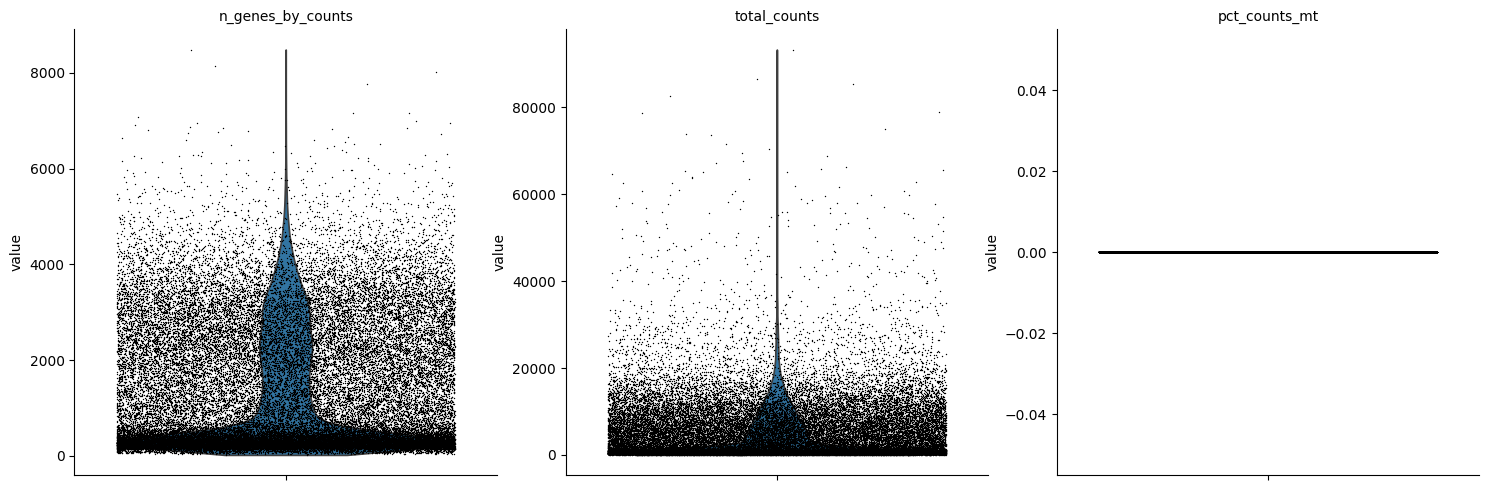

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

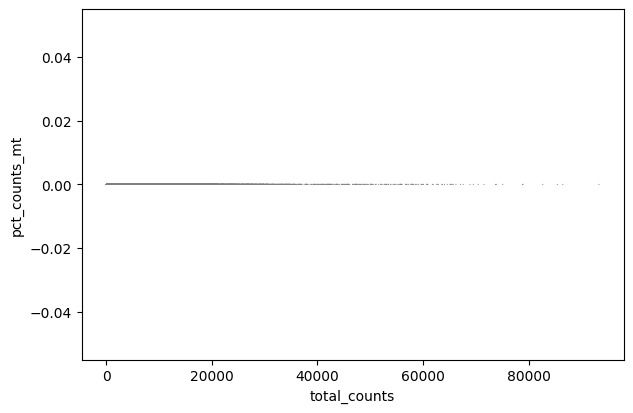

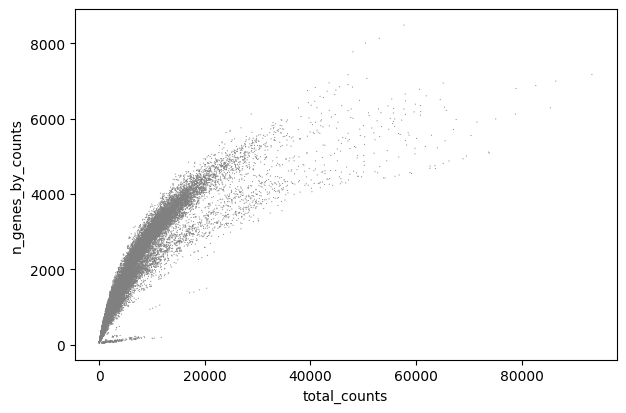

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

### Filter the data:

In [13]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_counts = 10)
sc.pp.filter_genes(adata, min_cells = 3)

Filter out cells in the 98th centile for gene count

In [14]:
upper_lim=np.quantile(adata.obs.n_genes_by_counts.values, .98)
upper_lim

4446.479999999996

In [15]:
adata = adata[adata.obs.pct_counts_mt < 20, :]
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

Plot again to ensure filtering has been successful:

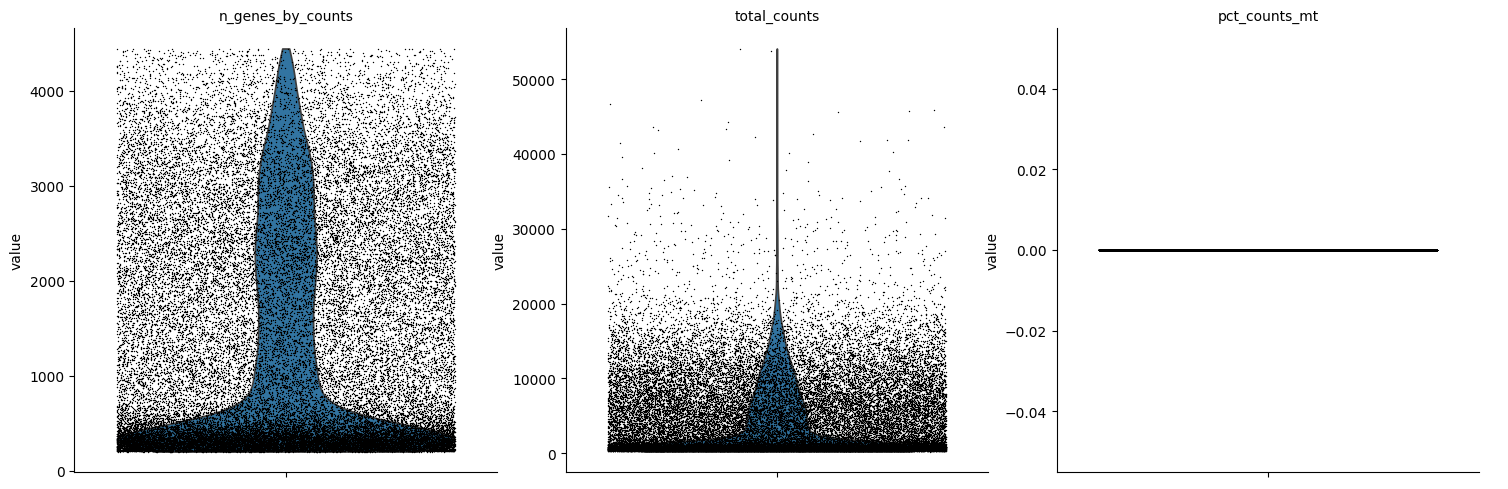

In [16]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

##### (could then doublet detection - not included here)

## Normalization and logarithmize

In [17]:
sc.pp.normalize_total(adata, exclude_highly_expressed = True, target_sum=1e4)

/home/anna/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sc.pp.log1p(adata)

#### Save this as the raw data:

In [19]:
adata.raw = adata

### Clustering - Feature selection:
This begins to reduce dimensionality to only include the highly variable genes

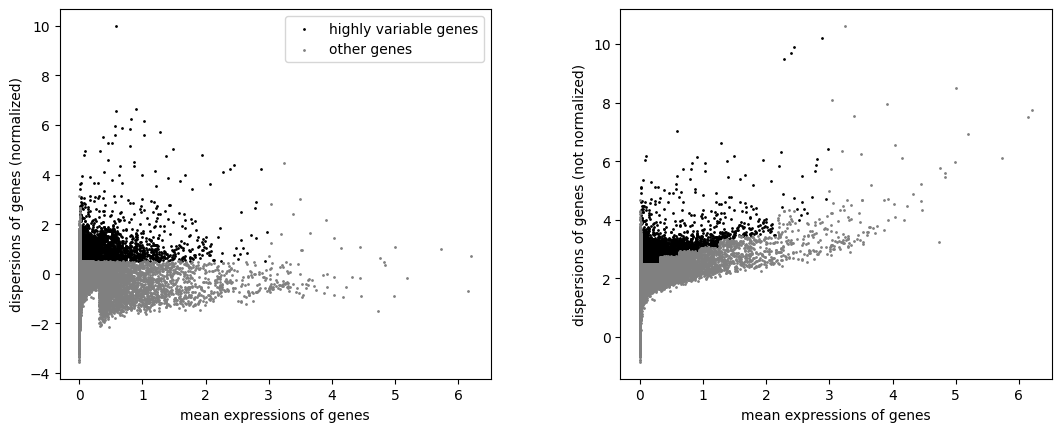

In [20]:
#Identify highly variable genes -  add columns to var data (highly_variable (True or False), and stats)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [21]:
# Filter out the non-highly variable genes:
adata = adata[:, adata.var.highly_variable]

In [22]:
# Regress out the differences that arise due to total counts and mt counts
# This will remove some variation due to processing and sample quality, sequencing artefact etc.
# Tends to overcorrect with different cell types!!


#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [23]:
# normalise each gene to the variance of that gene
sc.pp.scale(adata, max_value=10)

/home/anna/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [24]:
# Run PCA to further reduce dimensions
# adata.obs will now have 'distances' and 'connectivities' - which is a cell-by-cell matrix where every cell that is connected gets a value (neighbourhood matrix that is used for clustering) 
sc.pp.pca(adata, svd_solver='arpack')

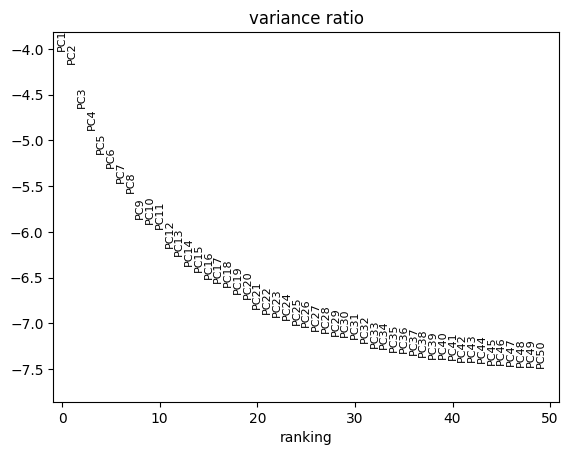

In [25]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [26]:
adata.

,Author,BioSample,Run,Tissue,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes
CellID,,,,,,,,,
SRR14309761:AAACCCACAGCGTACCx,Yang_2021,SAMN18844857,SRR14309761,placenta,271,520.0,0.0,0.0,271
SRR14309761:AAACGCTCATGATAGAx,Yang_2021,SAMN18844857,SRR14309761,placenta,235,465.0,0.0,0.0,235
SRR14309761:AAAGTGAGTATTGGCTx,Yang_2021,SAMN18844857,SRR14309761,placenta,333,483.0,0.0,0.0,333
SRR14309761:AAAGTCCCATGAATAGx,Yang_2021,SAMN18844857,SRR14309761,placenta,588,854.0,0.0,0.0,588
SRR14309761:AACAAGATCAACCTCCx,Yang_2021,SAMN18844857,SRR14309761,placenta,661,1697.0,0.0,0.0,661
...,...,...,...,...,...,...,...,...,...
SRR14309755:TTTGGTTGTATACCCAx,Yang_2021,SAMN18844863,SRR14309755,placenta,215,379.0,0.0,0.0,215
SRR14309755:TTTGTTGTCATTGCGAx,Yang_2021,SAMN18844863,SRR14309755,placenta,2313,7236.0,0.0,0.0,2313
SRR14309755:TTTCACAGTTTCGACAx,Yang_2021,SAMN18844863,SRR14309755,placenta,2845,9508.0,0.0,0.0,2845


In [26]:
#adata.write_h5ad('/home/anna/RP2/Yang/processed_yang.h5ad')

## Generating the UMAP (before PAGA)
#### Compute the neighbors, then do dimensionality reduction (UMAP), then identify clusters (Leiden)
Can also edit n_neighbors (default is 15, values should be between 2 and 100)

In [95]:
sc.pp.neighbors(adata, n_neighbors=50, n_pcs = 30)

####  PAGA

In [100]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [101]:
# Compute PAGA
sc.tl.paga(adata, groups='clusters')

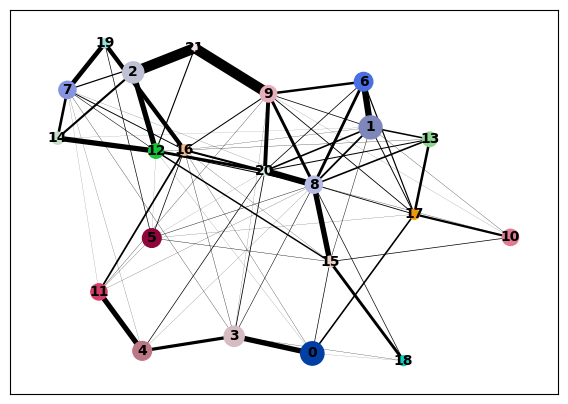

In [102]:
# Need to plot PAGA first
sc.pl.paga(adata, plot=True)

In [142]:
#Compute UMAP with PAGA
sc.tl.umap(adata, min_dist=0.7, spread=0.8, init_pos='paga')

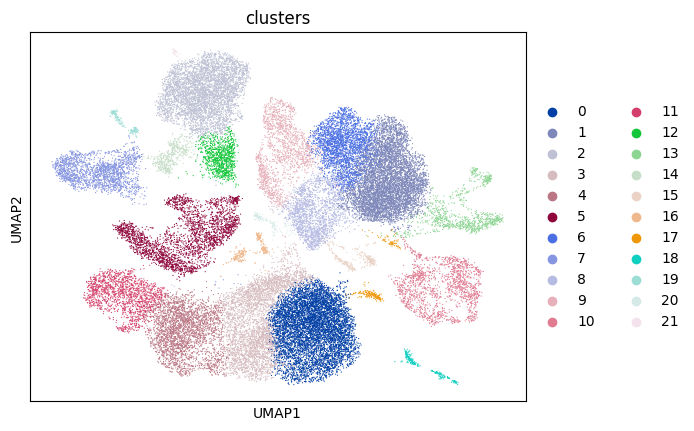

In [143]:
# Plot UMAP
sc.pl.umap(adata, color='clusters')

/home/anna/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


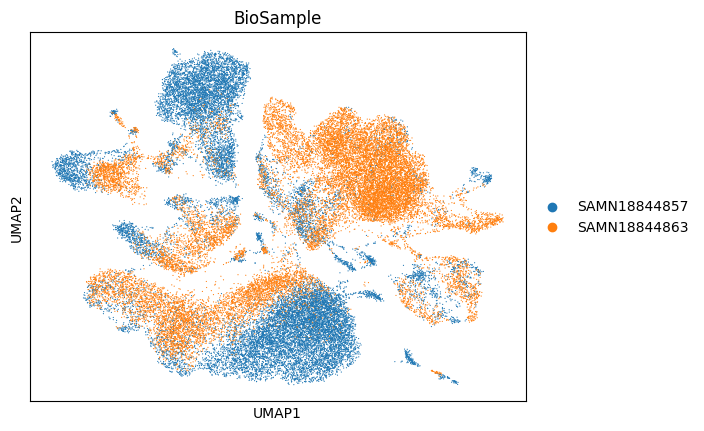

In [4]:
sc.pl.umap(adata, color="BioSample")

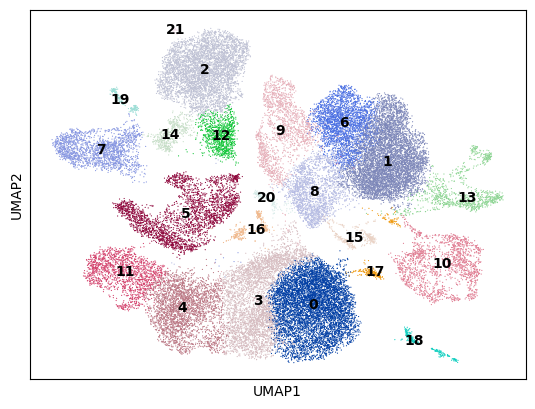

In [145]:
sc.pl.umap(adata, color='clusters', legend_loc='on data', title='') #additional to add names

### SAVE!

In [146]:
adata.write_h5ad('/home/anna/RP2/Yang/processed_yang.h5ad')

## Labelling the clusters:

In [147]:
sc.tl.rank_genes_groups(adata, 'clusters', method='wilcoxon', key_added="wilcoxon")

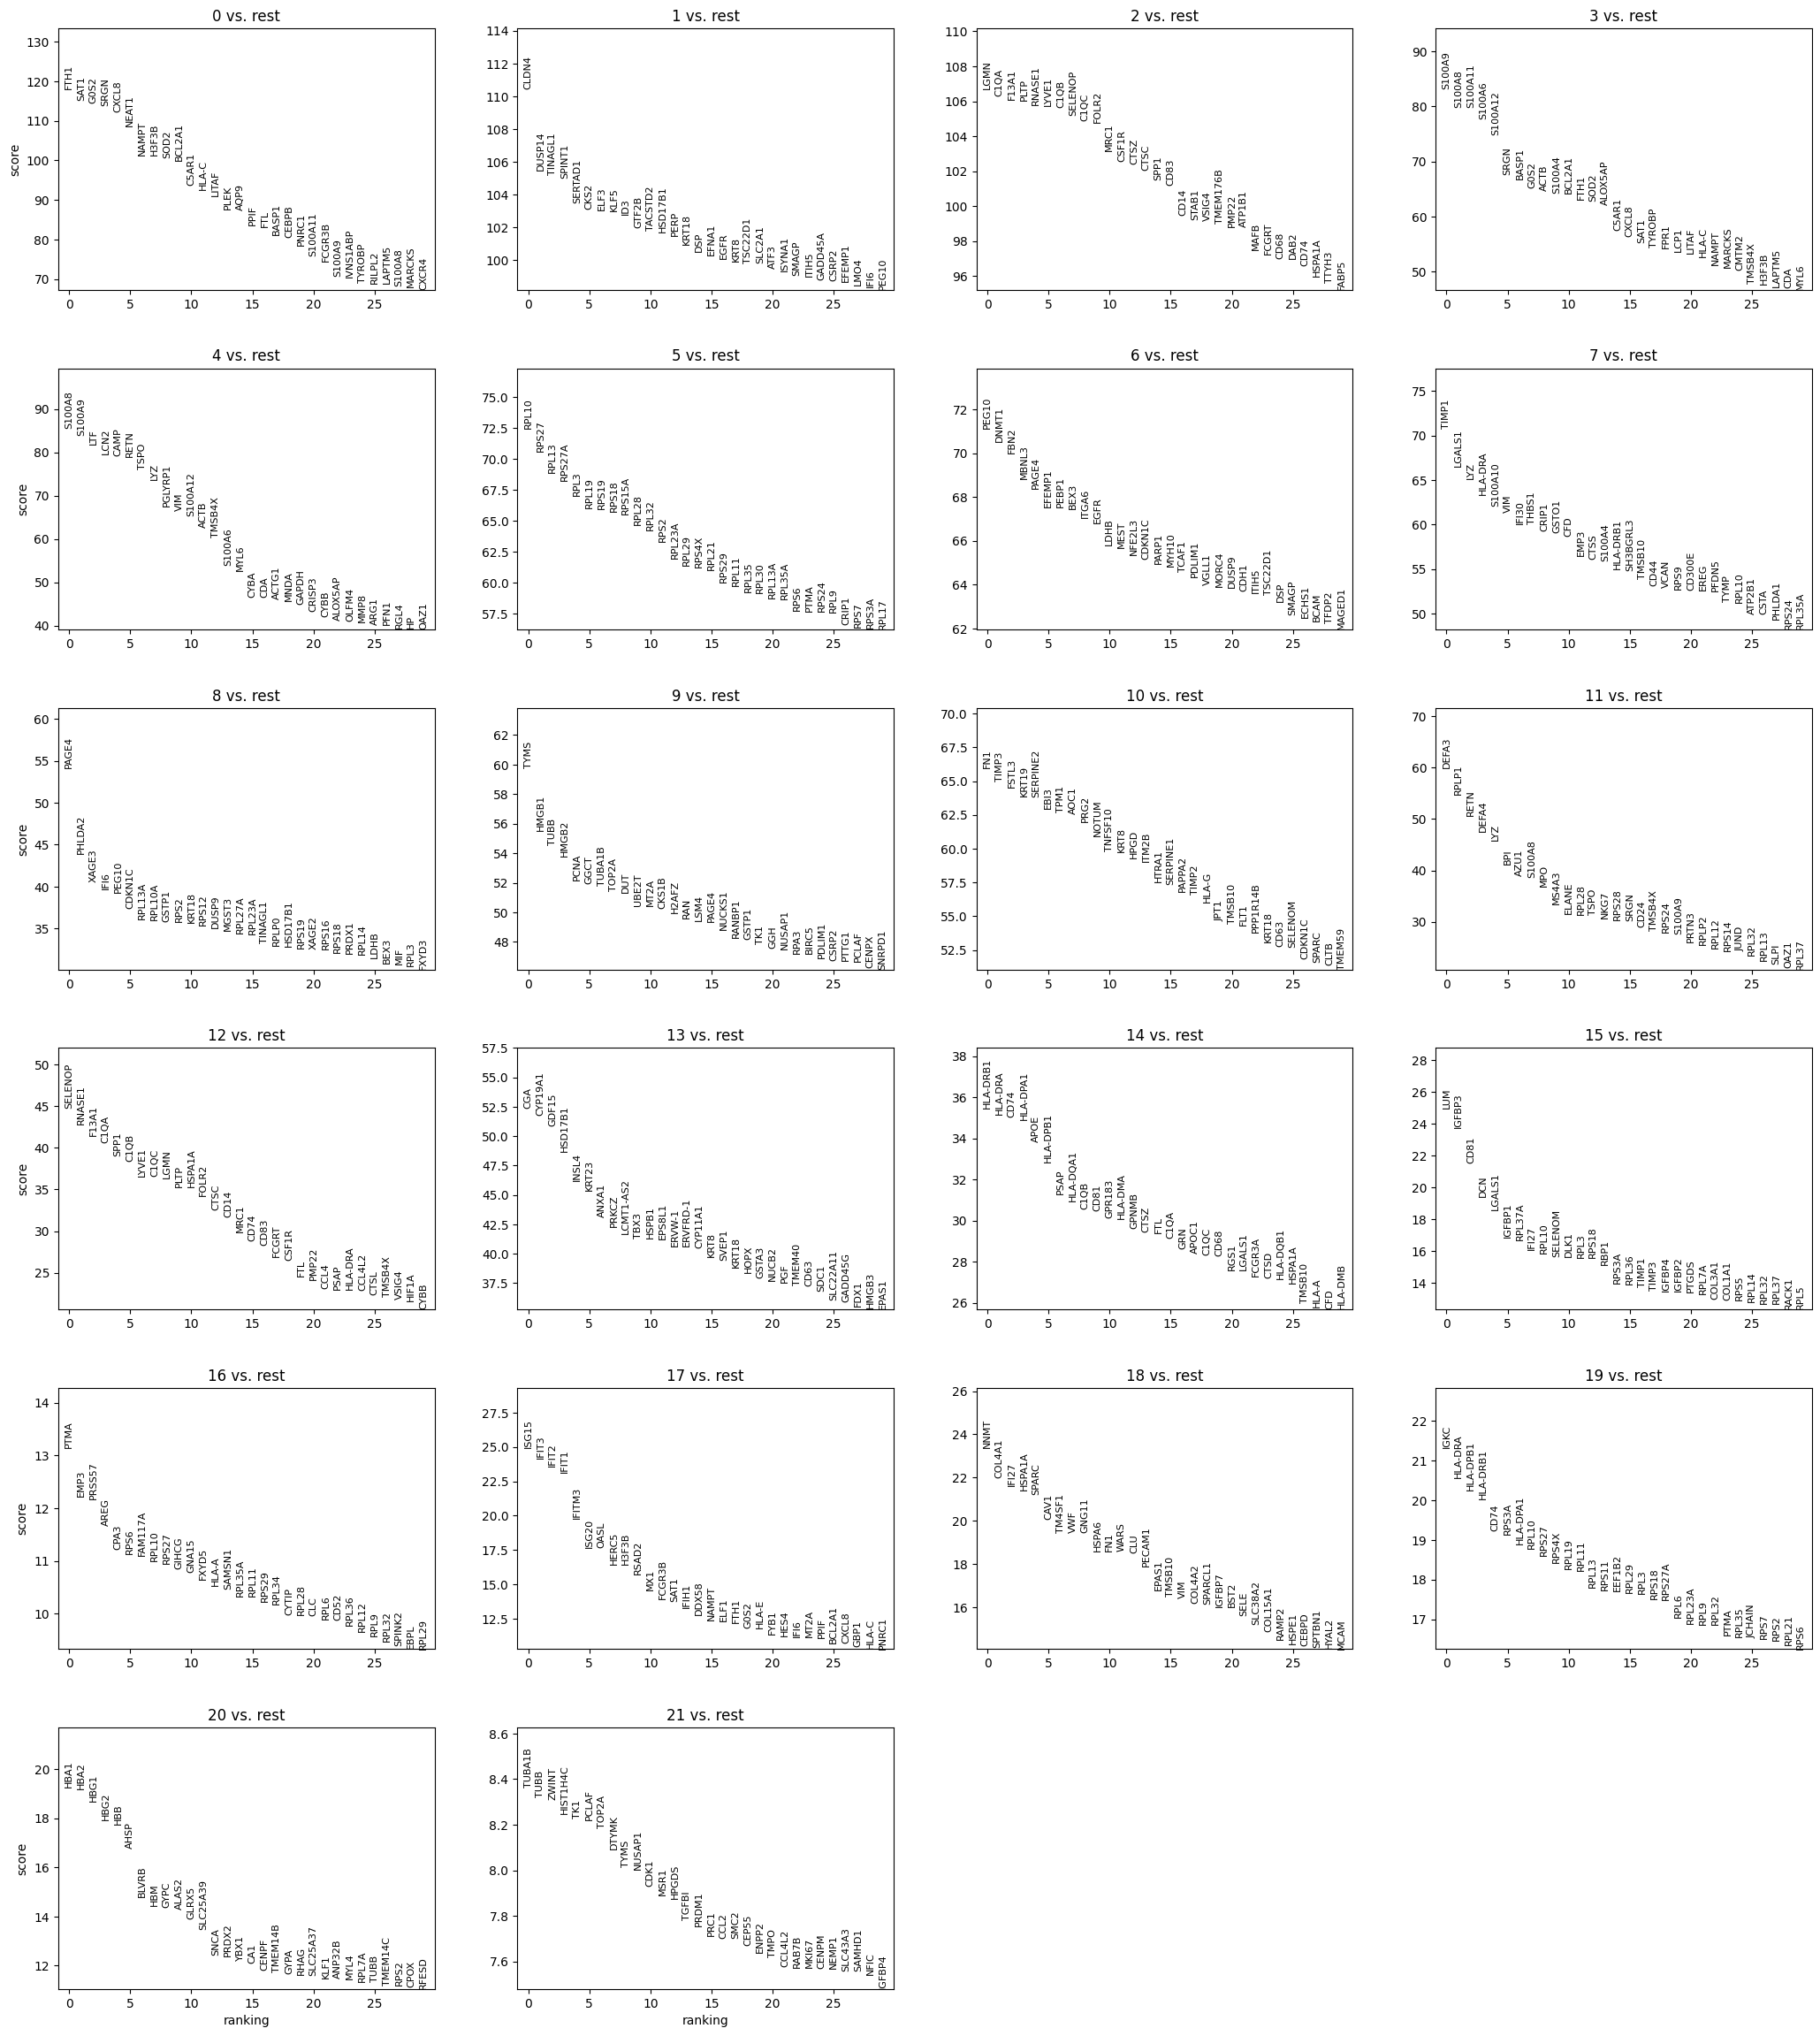

In [148]:
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False, key="wilcoxon")

In [149]:
# generate a csv file with this info:

result = adata.uns['wilcoxon']
groups = result['names'].dtype.names
adata_genes= pd.DataFrame(
    {group +'_' +key[:1]:result[key][group]
     for group in groups for key in ['names', 'pvals', 'logfoldchanges']})

In [150]:
adata_genes.head()

,0_n,0_p,0_l,1_n,1_p,1_l,2_n,2_p,2_l,3_n,...,18_l,19_n,19_p,19_l,20_n,20_p,20_l,21_n,21_p,21_l
0,FTH1,0.0,4.700829,CLDN4,0.0,4.881439,LGMN,0.0,5.835492,S100A9,...,8.403374,IGKC,7.872692e-101,14.405372,HBA1,1.930246e-82,13.256296,TUBA1B,6.163283e-17,4.602493
1,SAT1,0.0,3.515136,DUSP14,0.0,3.953635,C1QA,0.0,8.012996,S100A8,...,6.417456,HLA-DRA,5.157828e-94,6.631528,HBA2,7.117810e-82,12.593434,TUBB,8.774224e-17,5.256436
2,G0S2,0.0,6.771305,TINAGL1,0.0,4.410562,F13A1,0.0,7.914998,S100A11,...,7.449244,HLA-DPB1,3.825500e-91,6.062162,HBG1,5.614915e-78,12.997969,ZWINT,9.518795e-17,5.827012
3,SRGN,0.0,4.989814,SPINT1,0.0,4.314491,PLTP,0.0,7.830414,S100A6,...,5.084531,HLA-DRB1,2.638619e-89,5.897453,HBG2,8.410266e-72,12.279118,HIST1H4C,1.605016e-16,5.797032
4,CXCL8,0.0,6.762230,SERTAD1,0.0,3.897007,RNASE1,0.0,8.057824,S100A12,...,6.869404,CD74,2.085535e-82,5.417239,HBB,2.117482e-70,11.925790,TK1,1.929565e-16,5.799829


In [151]:
adata_genes.to_csv('/home/anna/RP2/Yang/Yang_marker_genes.csv')

In [152]:
# Get the Protein Atlas info loaded in

def gene_lookup(input_df, search_df):
    '''
    input_df: pandas dataframe with columns of different clusters, and rows containing gene names
    search_df: pandas dataframe containing the 'rna_single_cell_type_tissue.tsv' from human protein atlas (create a subset by tissue type)
    '''
    
    input_clusters = input_df.columns.tolist()
    output = []
    for cluster in input_clusters:  
        for gene in input_df[cluster].tolist():
            try:
                search = search_df[search_df['Gene name'] == gene].nlargest(3,'nTPM')
                output.append([cluster, gene, search['Cell type'].iloc[0],search['nTPM'].iloc[0],search['Cell type'].iloc[1],search['nTPM'].iloc[1],search['Cell type'].iloc[2],search['nTPM'].iloc[2]])
            except IndexError:
                output.append([cluster, gene, 'error', 'error', 'error', 'error', 'error', 'error'])
    return pd.DataFrame(output, columns = ['Cluster_Name', 'Gene_Name', 'Cell_Type_1', 'nTPM_1', 'Cell_Type_2', 'nTPM_2', 'Cell_Type_3', 'nTPM_3'])

In [153]:
df = pd.read_csv('/home/anna/RP2/vento-tormo/raw_data/protein_atlas_rna_single_cell_type_tissue.tsv', sep='\t')
placenta_df = df[df['Tissue'] == 'placenta'].copy() # create a dataframe of genes where the Tissue type is 'placenta'
df = None
placenta_df.head()

,Gene,Gene name,Tissue,Cluster,Cell type,Read count,nTPM
86,ENSG00000000003,TSPAN6,placenta,c-0,cytotrophoblasts,1254,25.7
87,ENSG00000000003,TSPAN6,placenta,c-1,smooth muscle cells,857,54.3
88,ENSG00000000003,TSPAN6,placenta,c-2,extravillous trophoblasts,1624,48.7
89,ENSG00000000003,TSPAN6,placenta,c-3,cytotrophoblasts,882,33.3
90,ENSG00000000003,TSPAN6,placenta,c-4,hofbauer cells,33,2.7


In [154]:
gene_to_cell_type_annotations = pd.read_csv('/home/anna/RP2/Yang/Yang_marker_genes.csv',index_col=0)#, skiprows=1)
gene_to_cell_type_annotations.head()

,0_n,0_p,0_l,1_n,1_p,1_l,2_n,2_p,2_l,3_n,...,18_l,19_n,19_p,19_l,20_n,20_p,20_l,21_n,21_p,21_l
0,FTH1,0.0,4.700829,CLDN4,0.0,4.881439,LGMN,0.0,5.835492,S100A9,...,8.403374,IGKC,7.872692e-101,14.405372,HBA1,1.930246e-82,13.256296,TUBA1B,6.163283e-17,4.602493
1,SAT1,0.0,3.515135,DUSP14,0.0,3.953635,C1QA,0.0,8.012996,S100A8,...,6.417456,HLA-DRA,5.157828e-94,6.631528,HBA2,7.117810e-82,12.593434,TUBB,8.774224e-17,5.256436
2,G0S2,0.0,6.771305,TINAGL1,0.0,4.410562,F13A1,0.0,7.914998,S100A11,...,7.449243,HLA-DPB1,3.825500e-91,6.062162,HBG1,5.614915e-78,12.997969,ZWINT,9.518795e-17,5.827012
3,SRGN,0.0,4.989814,SPINT1,0.0,4.314491,PLTP,0.0,7.830414,S100A6,...,5.084531,HLA-DRB1,2.638619e-89,5.897453,HBG2,8.410266e-72,12.279118,HIST1H4C,1.605016e-16,5.797032
4,CXCL8,0.0,6.762230,SERTAD1,0.0,3.897007,RNASE1,0.0,8.057824,S100A12,...,6.869404,CD74,2.085535e-82,5.417239,HBB,2.117482e-70,11.925790,TK1,1.929565e-16,5.799829


In [155]:
gene_to_cell_type_annotations = gene_to_cell_type_annotations.loc[:,gene_to_cell_type_annotations.columns].head(30).copy() # keeps columns and first 30 genes
gene_to_cell_type_annotations

,0_n,0_p,0_l,1_n,1_p,1_l,2_n,2_p,2_l,3_n,...,18_l,19_n,19_p,19_l,20_n,20_p,20_l,21_n,21_p,21_l
0,FTH1,0.0,4.700829,CLDN4,0.0,4.881439,LGMN,0.0,5.835492,S100A9,...,8.403374,IGKC,7.872692e-101,14.405372,HBA1,1.930246e-82,13.256296,TUBA1B,6.163283e-17,4.602493
1,SAT1,0.0,3.515135,DUSP14,0.0,3.953635,C1QA,0.0,8.012996,S100A8,...,6.417456,HLA-DRA,5.157828e-94,6.631528,HBA2,7.117810e-82,12.593434,TUBB,8.774224e-17,5.256436
2,G0S2,0.0,6.771305,TINAGL1,0.0,4.410562,F13A1,0.0,7.914998,S100A11,...,7.449243,HLA-DPB1,3.825500e-91,6.062162,HBG1,5.614915e-78,12.997969,ZWINT,9.518795e-17,5.827012
3,SRGN,0.0,4.989814,SPINT1,0.0,4.314491,PLTP,0.0,7.830414,S100A6,...,5.084531,HLA-DRB1,2.638619e-89,5.897453,HBG2,8.410266e-72,12.279118,HIST1H4C,1.605016e-16,5.797032
4,CXCL8,0.0,6.762230,SERTAD1,0.0,3.897007,RNASE1,0.0,8.057824,S100A12,...,6.869404,CD74,2.085535e-82,5.417239,HBB,2.117482e-70,11.925790,TK1,1.929565e-16,5.799829
5,NEAT1,0.0,3.536480,CKS2,0.0,4.060476,LYVE1,0.0,7.867478,SRGN,...,5.694886,RPS3A,1.138307e-81,2.973149,AHSP,5.237283e-63,12.374847,PCLAF,2.055524e-16,5.980579
6,NAMPT,0.0,4.333743,ELF3,0.0,4.136929,C1QB,0.0,7.789433,BASP1,...,11.374146,HLA-DPA1,1.541317e-79,5.447279,BLVRB,1.523008e-49,4.995869,TOP2A,2.718024e-16,6.234910
7,H3F3B,0.0,2.302805,KLF5,0.0,3.880675,SELENOP,0.0,6.347867,G0S2,...,11.506898,RPL10,1.096419e-78,2.922749,HBM,3.290030e-47,12.567262,DTYMK,5.895654e-16,4.769397
8,SOD2,0.0,4.524941,ID3,0.0,4.399458,C1QC,0.0,7.274824,ACTB,...,7.842492,RPS27,3.108727e-77,2.801586,GYPC,9.916344e-47,4.548031,TYMS,1.119433e-15,5.472347
9,BCL2A1,0.0,4.880176,GTF2B,0.0,3.714406,FOLR2,0.0,7.254669,S100A4,...,6.485384,RPS4X,8.820247e-76,3.013475,ALAS2,3.003372e-46,11.644606,NUSAP1,1.223385e-15,5.077181


In [156]:
results = gene_lookup(gene_to_cell_type_annotations, placenta_df) # second variable is the dataframe created from a subset of the human protein atlas
results

,Cluster_Name,Gene_Name,Cell_Type_1,nTPM_1,Cell_Type_2,nTPM_2,Cell_Type_3,nTPM_3
0,0_n,FTH1,hofbauer cells,42497.3,hofbauer cells,34586.7,hofbauer cells,9919.8
1,0_n,SAT1,hofbauer cells,9990.7,hofbauer cells,3890.6,syncytiotrophoblasts,3357.6
2,0_n,G0S2,hofbauer cells,3326.8,mixed immune cells,861.7,hofbauer cells,515.6
3,0_n,SRGN,hofbauer cells,9595.1,hofbauer cells,1692.0,t-cells,1136.8
4,0_n,CXCL8,hofbauer cells,4801.2,hofbauer cells,616.9,hofbauer cells,375.3
...,...,...,...,...,...,...,...,...
1975,21_l,5.677504,error,error,error,error,error,error
1976,21_l,4.052603,error,error,error,error,error,error
1977,21_l,4.282922,error,error,error,error,error,error
1978,21_l,4.572111,error,error,error,error,error,error


In [157]:
results.to_csv('/home/anna/RP2/Yang/Yang_marker_genes_to _cell_type_annotation_2.csv')

In [57]:
# create a dictionary to map cluster to annotation label
celltype = {
     '0': 'MYE',
     '1': 'CTB',
     '2': 'HB',
     '3': 'MYE',
     '4': 'MYE',
     '5': 'TCELL',
     '6': 'CTB',
     '7': 'HB',
     '8': 'CTB',
     '9': 'CTB',
    '10': 'EVT',
    '11': 'MYE', 
    '12': 'HB',
    '13': 'STB',
    '14': 'HB',
    '15': 'SM',
    '16': 'SM',
    '17': 'MYE',
    '18': 'END',
    '19': 'BCELL',
    '20': 'MIC',
    '21': 'HB', 
}


# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['cell type'] = adata.obs['clusters'].map(celltype).astype('category')


In [59]:
# create a dictionary to map cluster to annotation label
uniquecelltype = {
     '0': 'MYE_1',
     '1': 'CTB_1',
     '2': 'HB_1',
     '3': 'MYE_2',
     '4': 'MYE_3',
     '5': 'TCELL_1',
     '6': 'CTB_2',
     '7': 'HB_2',
     '8': 'CTB_3',
     '9': 'CTB_4',
    '10': 'EVT_1',
    '11': 'MYE_4', 
    '12': 'HB_3',
    '13': 'STB_1',
    '14': 'HB_4',
    '15': 'SM_1',
    '16': 'SM_2',
    '17': 'MYE_5',
    '18': 'END_1',
    '19': 'BCELL_1',
    '20': 'MIC_1',
    '21': 'HB_5',
}


# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['unique cell type'] = adata.obs['clusters'].map(uniquecelltype).astype('category')

/home/anna/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


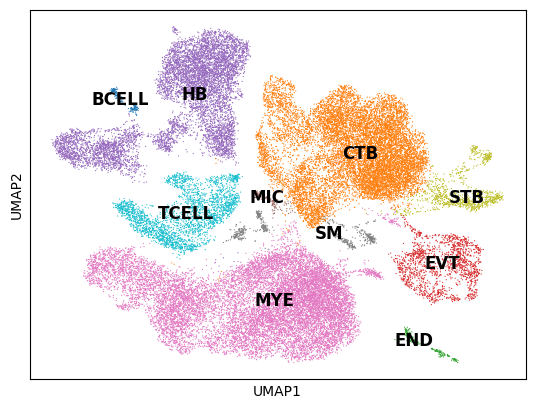

In [3]:
sc.pl.umap(adata, color='cell type', title='', legend_loc='on data', legend_fontsize=12)

/home/anna/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


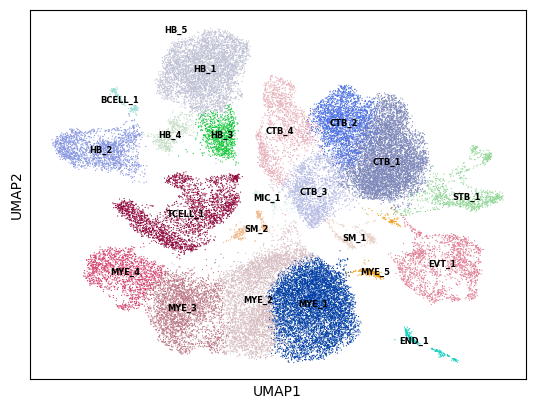

In [61]:
sc.pl.umap(adata, color='unique cell type', title='', legend_loc='on data', legend_fontsize=6)

In [62]:
adata.write_h5ad('/home/anna/RP2/Yang/processed_yang.h5ad')

# Looking at melatonin related genes:

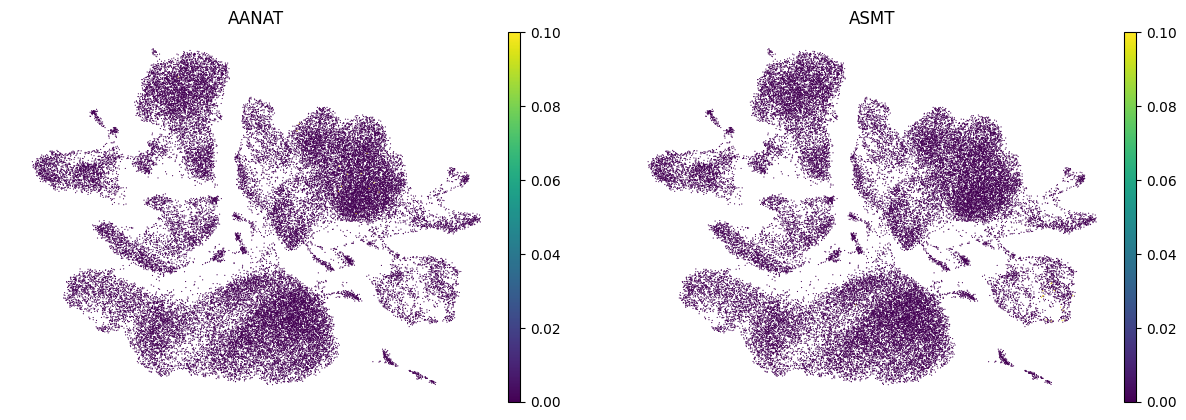

In [5]:
sc.pl.umap(adata, color = ['AANAT', 'ASMT'], frameon = False, vmax = 0.1)

In [145]:
gene_of_interest = "MTNR1B"

# Check if the gene is present in the var_names (gene names)
if gene_of_interest in adata.var_names:
    # Get the index of the gene in the var_names
    gene_index = list(adata.var_names).index(gene_of_interest)
    
    # Extract expression values for the gene across all cells
    expression_values = adata[:, gene_index].X
    
    # Calculate total counts and number of cells expressing the gene
    total_counts = expression_values.sum()
    num_expressing_cells = (expression_values > 0).sum()
    
    print(f"The gene {gene_of_interest} has a total count of {total_counts} and is expressed in {num_expressing_cells} cells.")
else:
    print(f"The gene {gene_of_interest} is not present in the dataset.")

The gene MTNR1B is not present in the dataset.


## Export processed data as csv files:

In [70]:
adata.write_csvs("RP2/Yang/yang_anndata.csvs", skip_data=False)